In [3]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_json("roam_prescription_based_prediction.jsonl" , lines = True)

In [4]:
data.head()

,cms_prescription_counts,npi,provider_variables
0,"{'DOXAZOSIN MESYLATE': 26, 'MIDODRINE HCL': 12...",1295763035,"{'settlement_type': 'non-urban', 'generic_rx_c..."
1,"{'CEPHALEXIN': 23, 'AMOXICILLIN': 52, 'HYDROCO...",1992715205,"{'settlement_type': 'non-urban', 'generic_rx_c..."
2,"{'CEPHALEXIN': 28, 'AMOXICILLIN': 73, 'CLINDAM...",1578587630,"{'settlement_type': 'non-urban', 'generic_rx_c..."
3,{'AMOXICILLIN': 63},1932278405,"{'settlement_type': 'non-urban', 'generic_rx_c..."
4,"{'PIOGLITAZONE HCL': 24, 'BENAZEPRIL HCL': 29,...",1437366804,"{'settlement_type': 'non-urban', 'generic_rx_c..."


In [8]:
npi_data = pd.DataFrame(data['npi'])
provider_data = pd.DataFrame([v for v in data['provider_variables']])
prescription_data = pd.DataFrame([v for v in data['cms_prescription_counts']])
FinalData = pd.concat([npi_data, provider_data , prescription_data] , axis = 1)

In [9]:
FinalData.head()

,npi,brand_name_rx_count,gender,generic_rx_count,region,settlement_type,specialty,years_practicing,1ST TIER UNIFINE PENTIPS,ABACAVIR,...,ZYFLO,ZYFLO CR,ZYLET,ZYLOPRIM,ZYMAXID,ZYPREXA,ZYPREXA RELPREVV,ZYPREXA ZYDIS,ZYTIGA,ZYVOX
0,1295763035,384,M,2287,South,non-urban,Nephrology,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992715205,0,M,103,South,non-urban,General Practice,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1578587630,0,M,112,Midwest,non-urban,General Practice,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1932278405,0,M,63,South,non-urban,General Practice,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1437366804,316,M,1035,West,non-urban,Nephrology,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
FinalData.describe()

,npi,brand_name_rx_count,generic_rx_count,years_practicing,1ST TIER UNIFINE PENTIPS,ABACAVIR,ABELCET,ABILIFY,ABILIFY DISCMELT,ABILIFY MAINTENA,...,ZYFLO,ZYFLO CR,ZYLET,ZYLOPRIM,ZYMAXID,ZYPREXA,ZYPREXA RELPREVV,ZYPREXA ZYDIS,ZYTIGA,ZYVOX
count,2.399300e+05,239930.000000,239930.000000,239930.000000,10.000000,828.000000,9.000000,20288.000000,81.000000,253.000000,...,2.0,83.000000,8.000000,6.000000,23.000000,785.000000,144.000000,137.000000,1377.000000,90.000000
mean,1.500000e+09,176.264144,795.547047,6.241875,12.300000,26.421498,18.222222,67.318858,14.679012,19.956522,...,11.0,15.710843,21.750000,12.166667,28.521739,15.775796,35.604167,14.927007,23.652142,16.100000
std,2.878876e+08,475.159281,1809.618284,1.649269,2.162817,20.192960,6.514940,83.135411,7.424330,12.300555,...,0.0,8.198052,15.899236,0.408248,17.783725,6.512600,58.602277,5.310416,19.475095,9.346092
min,1.003000e+09,0.000000,0.000000,1.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.0,11.000000,11.000000,12.000000,12.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,1.245543e+09,0.000000,36.000000,6.000000,11.000000,13.000000,14.000000,19.000000,11.000000,12.000000,...,11.0,12.000000,12.500000,12.000000,16.000000,12.000000,14.000000,12.000000,13.000000,11.000000
50%,1.508072e+09,15.000000,145.000000,7.000000,11.500000,19.000000,16.000000,38.000000,12.000000,16.000000,...,11.0,13.000000,16.500000,12.000000,20.000000,13.000000,22.000000,13.000000,18.000000,13.000000
75%,1.740572e+09,154.000000,750.000000,7.000000,12.750000,31.000000,20.000000,83.000000,14.000000,22.000000,...,11.0,16.500000,23.250000,12.000000,37.500000,17.000000,36.000000,16.000000,26.000000,15.750000
max,1.993000e+09,30547.000000,101079.000000,8.000000,18.000000,180.000000,29.000000,2120.000000,69.000000,99.000000,...,11.0,60.000000,59.000000,13.000000,78.000000,50.000000,641.000000,38.000000,229.000000,66.000000


In [25]:
specialtyList = FinalData.specialty.value_counts()

In [44]:
specialtyList = specialtyList[specialtyList > 1000]

In [45]:
specialtyList.__class__

pandas.core.series.Series

In [47]:
specialtyUse = list(specialtyList.index)
print(specialtyUse.__class__)
print(len(specialtyUse))

<class 'list'>
33


In [48]:
FinalDataSubset = FinalData[FinalData.specialty.isin(specialtyUse)]

In [49]:
print(FinalDataSubset.shape)
print(FinalData.shape)

(215695, 2405)
(239930, 2405)


In [61]:
FinalDataDrugSubset = FinalDataSubset[FinalDataSubset.isnull().sum(axis = 1) < 2350]

In [62]:
print(FinalDataDrugSubset.shape)

(29594, 2405)


In [63]:
FinalDataDrugSubset.to_csv("FinalDataDrugSubset.csv")

In [64]:
FinalDataDrugSubset.describe()

,npi,brand_name_rx_count,generic_rx_count,years_practicing,1ST TIER UNIFINE PENTIPS,ABACAVIR,ABELCET,ABILIFY,ABILIFY DISCMELT,ABILIFY MAINTENA,...,ZYFLO,ZYFLO CR,ZYLET,ZYLOPRIM,ZYMAXID,ZYPREXA,ZYPREXA RELPREVV,ZYPREXA ZYDIS,ZYTIGA,ZYVOX
count,2.959400e+04,29594.000000,29594.000000,29594.000000,8.000000,400.000000,4.000000,6570.000000,43.000000,186.000000,...,0.0,18.000000,3.000000,5.000000,3.000000,430.000000,101.000000,84.000000,186.00000,39.000000
mean,1.500632e+09,866.896567,3874.476516,6.652294,12.625000,32.965000,19.500000,111.296956,15.023256,20.430108,...,NaN,13.666667,16.000000,12.200000,18.000000,16.646512,33.742574,15.011905,23.66129,16.564103
std,2.868977e+08,990.120208,3398.969493,1.460089,2.326094,24.372399,6.952218,116.849301,9.343927,13.123033,...,NaN,3.067860,6.244998,0.447214,2.645751,7.312898,32.107212,5.158906,14.09076,11.449649
min,1.003015e+09,0.000000,431.000000,1.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,NaN,11.000000,11.000000,12.000000,15.000000,11.000000,11.000000,11.000000,11.00000,11.000000
25%,1.255336e+09,355.000000,1964.000000,7.000000,11.000000,17.000000,17.000000,25.000000,11.000000,12.000000,...,NaN,12.000000,12.500000,12.000000,17.000000,12.000000,14.000000,12.000000,14.00000,11.000000
50%,1.508060e+09,599.000000,2971.000000,7.000000,12.000000,26.000000,19.500000,79.000000,12.000000,16.000000,...,NaN,12.000000,14.000000,12.000000,19.000000,13.000000,22.000000,13.000000,20.00000,12.000000
75%,1.740500e+09,1029.000000,4600.750000,7.000000,13.000000,41.000000,22.000000,155.000000,13.000000,22.750000,...,NaN,15.500000,18.500000,12.000000,19.500000,20.000000,36.000000,17.000000,29.00000,15.000000
max,1.992997e+09,30547.000000,101079.000000,8.000000,18.000000,180.000000,28.000000,2120.000000,69.000000,99.000000,...,NaN,22.000000,23.000000,13.000000,20.000000,50.000000,204.000000,38.000000,108.00000,66.000000


## Filtering columns (removing drugs) which have more than 70% nulls

In [65]:
FinalDataDrugSubset.shape[1]

2405

In [74]:
FinalDataImpDrugsSubset = FinalDataDrugSubset.loc[:,FinalDataDrugSubset.isnull().sum(axis = 0) < 0.9*FinalDataDrugSubset.shape[0]]

In [75]:
FinalDataImpDrugsSubset.shape

(29594, 226)

In [76]:
FinalDataImpDrugsSubset.head()

,npi,brand_name_rx_count,gender,generic_rx_count,region,settlement_type,specialty,years_practicing,ABILIFY,ACETAMINOPHEN-CODEINE,...,VENTOLIN HFA,VERAPAMIL ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN SODIUM,XARELTO,ZETIA,ZIPRASIDONE HCL,ZOLPIDEM TARTRATE
0,1295763035,384,M,2287,South,non-urban,Nephrology,7,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0
4,1437366804,316,M,1035,West,non-urban,Nephrology,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,35.0
8,1316196462,374,M,2452,Northeast,urban,Gastroenterology,5,NaN,NaN,...,NaN,NaN,NaN,17.0,NaN,88.0,23.0,NaN,NaN,NaN
16,1215979554,683,M,3462,Midwest,urban,Psychiatry,7,110.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,116.0
19,1174564165,143,M,2300,Northeast,urban,Psychiatry,7,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,92.0


In [79]:
FinalDataImpDrugsSubset.describe(include='all')

,npi,brand_name_rx_count,gender,generic_rx_count,region,settlement_type,specialty,years_practicing,ABILIFY,ACETAMINOPHEN-CODEINE,...,VENTOLIN HFA,VERAPAMIL ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN SODIUM,XARELTO,ZETIA,ZIPRASIDONE HCL,ZOLPIDEM TARTRATE
count,2.959400e+04,29594.000000,29594,29594.000000,29594,29594,29594,29594.000000,6570.000000,4450.000000,...,5591.000000,8508.000000,3385.000000,3757.000000,5192.000000,18152.000000,5903.000000,11530.000000,4367.000000,20042.000000
unique,NaN,NaN,2,NaN,4,2,30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,M,NaN,South,non-urban,Cardiovascular Disease,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18425,NaN,11871,17621,5654,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.500632e+09,866.896567,NaN,3874.476516,NaN,NaN,NaN,6.652294,111.296956,28.271685,...,29.328564,25.885402,25.464697,44.007985,25.726695,118.145108,55.130612,43.947702,73.365239,68.357300
std,2.868977e+08,990.120208,NaN,3398.969493,NaN,NaN,NaN,1.460089,116.849301,30.832090,...,54.615942,22.205976,31.362264,75.122665,20.433338,161.903704,56.200120,50.670992,67.915789,87.653877
min,1.003015e+09,0.000000,NaN,431.000000,NaN,NaN,NaN,1.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,1.255336e+09,355.000000,NaN,1964.000000,NaN,NaN,NaN,7.000000,25.000000,14.000000,...,14.000000,14.000000,13.000000,15.000000,13.000000,29.000000,20.000000,17.000000,27.000000,23.000000
50%,1.508060e+09,599.000000,NaN,2971.000000,NaN,NaN,NaN,7.000000,79.000000,19.000000,...,20.000000,19.000000,17.000000,23.000000,19.000000,64.000000,38.000000,28.000000,55.000000,42.000000
75%,1.740500e+09,1029.000000,NaN,4600.750000,NaN,NaN,NaN,7.000000,155.000000,31.000000,...,31.000000,30.000000,27.000000,44.000000,30.000000,150.000000,71.000000,51.000000,97.000000,80.000000


In [81]:
FinalDataImpDrugsSubset.specialty.value_counts(ascending= False)

Cardiovascular Disease                  5654
Family                                  5260
Psychiatry                              3449
Medical                                 2175
Nephrology                              2037
Geriatric Medicine                      1951
Neurology                               1902
Endocrinology, Diabetes & Metabolism    1479
Adult Health                            1006
Rheumatology                             927
Pulmonary Disease                        791
Infectious Disease                       596
Hematology & Oncology                    491
Gastroenterology                         423
Interventional Cardiology                421
Psych/Mental Health                      391
Pain Medicine                            164
Acute Care                               130
Sports Medicine                          112
Medical Oncology                          61
Child & Adolescent Psychiatry             60
Surgical Technologist                     26
General Pr

In [83]:
ImpSpec = FinalDataImpDrugsSubset.specialty.value_counts()
ImpSpec = ImpSpec[ImpSpec > 200]

In [84]:
ImpSpec

Cardiovascular Disease                  5654
Family                                  5260
Psychiatry                              3449
Medical                                 2175
Nephrology                              2037
Geriatric Medicine                      1951
Neurology                               1902
Endocrinology, Diabetes & Metabolism    1479
Adult Health                            1006
Rheumatology                             927
Pulmonary Disease                        791
Infectious Disease                       596
Hematology & Oncology                    491
Gastroenterology                         423
Interventional Cardiology                421
Psych/Mental Health                      391
Name: specialty, dtype: int64

In [85]:
FinalDataImpDrugsSpecSubset = FinalDataImpDrugsSubset[FinalDataImpDrugsSubset.specialty.isin(list(ImpSpec.index))]

In [86]:
FinalDataImpDrugsSpecSubset.shape

(28953, 226)

In [87]:
FinalDataImpDrugsSpecSubset.to_csv("FinalDataImpDrugsSpecSubset.csv")

In [88]:
FinalDataImpDrugsSpecSubset.dtypes

npi                                 int64
brand_name_rx_count                 int64
gender                             object
generic_rx_count                    int64
region                             object
settlement_type                    object
specialty                          object
years_practicing                    int64
ABILIFY                           float64
ACETAMINOPHEN-CODEINE             float64
ADVAIR DISKUS                     float64
AGGRENOX                          float64
ALENDRONATE SODIUM                float64
ALLOPURINOL                       float64
ALPRAZOLAM                        float64
AMIODARONE HCL                    float64
AMITRIPTYLINE HCL                 float64
AMLODIPINE BESYLATE               float64
AMLODIPINE BESYLATE-BENAZEPRIL    float64
AMOX TR-POTASSIUM CLAVULANATE     float64
AMOXICILLIN                       float64
AMPHETAMINE SALT COMBO            float64
ATENOLOL                          float64
ATORVASTATIN CALCIUM              

In [89]:
FinalDataImpDrugsSpecSubset.describe(include = ['object'])

,gender,region,settlement_type,specialty
count,28953,28953,28953,28953
unique,2,4,2,16
top,M,South,non-urban,Cardiovascular Disease
freq,18017,11547,17272,5654


In [90]:
%matplotlib inline

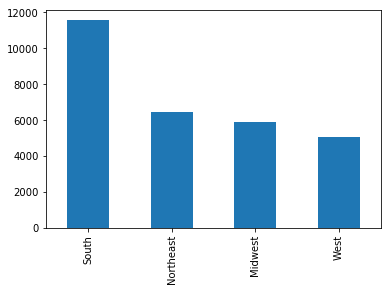

In [96]:
FinalDataImpDrugsSpecSubset.region.value_counts().plot.bar()

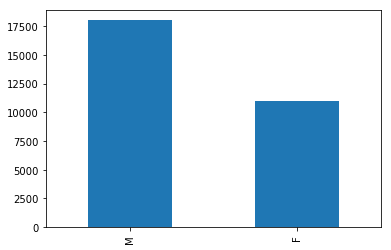

In [97]:
FinalDataImpDrugsSpecSubset.gender.value_counts().plot.bar()

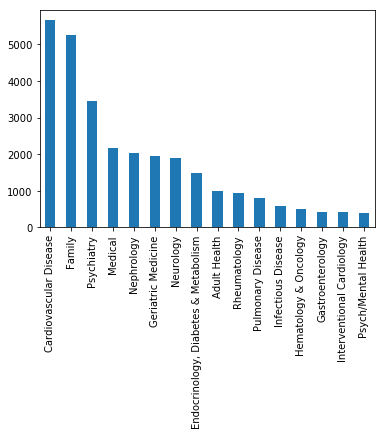

In [98]:
FinalDataImpDrugsSpecSubset.specialty.value_counts().plot.bar()

In [99]:
FinalDataImpDrugsSpecSubset.head()

,npi,brand_name_rx_count,gender,generic_rx_count,region,settlement_type,specialty,years_practicing,ABILIFY,ACETAMINOPHEN-CODEINE,...,VENTOLIN HFA,VERAPAMIL ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN SODIUM,XARELTO,ZETIA,ZIPRASIDONE HCL,ZOLPIDEM TARTRATE
0,1295763035,384,M,2287,South,non-urban,Nephrology,7,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0
4,1437366804,316,M,1035,West,non-urban,Nephrology,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,35.0
8,1316196462,374,M,2452,Northeast,urban,Gastroenterology,5,NaN,NaN,...,NaN,NaN,NaN,17.0,NaN,88.0,23.0,NaN,NaN,NaN
16,1215979554,683,M,3462,Midwest,urban,Psychiatry,7,110.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,116.0
19,1174564165,143,M,2300,Northeast,urban,Psychiatry,7,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,92.0


In [104]:
colList = list(FinalDataImpDrugsSpecSubset.columns[:8])

In [105]:
colList

['npi',
 'brand_name_rx_count',
 'gender',
 'generic_rx_count',
 'region',
 'settlement_type',
 'specialty',
 'years_practicing']

In [107]:
FinalDataImpDrugsSpecTranspose = FinalDataImpDrugsSpecSubset.melt(id_vars= colList)

In [108]:
FinalDataImpDrugsSpecTranspose = FinalDataImpDrugsSpecTranspose[~FinalDataImpDrugsSpecTranspose.value.isnull()]

In [109]:
FinalDataImpDrugsSpecTranspose.head()

,npi,brand_name_rx_count,gender,generic_rx_count,region,settlement_type,specialty,years_practicing,variable,value
0,1295763035,384,M,2287,South,non-urban,Nephrology,7,ABILIFY,11.0
3,1215979554,683,M,3462,Midwest,urban,Psychiatry,7,ABILIFY,110.0
4,1174564165,143,M,2300,Northeast,urban,Psychiatry,7,ABILIFY,15.0
6,1043561624,451,F,3112,West,non-urban,Psych/Mental Health,1,ABILIFY,107.0
8,1306880281,437,M,7109,Midwest,urban,Psychiatry,7,ABILIFY,126.0


In [110]:
FinalDataImpDrugsSpecTranspose.shape

(1859771, 10)

In [112]:
FinalDataImpDrugsSpecTranspose.isnull().sum()

npi                    0
brand_name_rx_count    0
gender                 0
generic_rx_count       0
region                 0
settlement_type        0
specialty              0
years_practicing       0
variable               0
value                  0
dtype: int64

In [119]:
FinalDataImpDrugsSpecTranspose.rename(columns= {"variable" : "product" , "value" : "Trx"} , inplace=True)

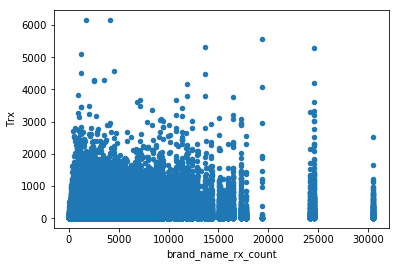

In [120]:
FinalDataImpDrugsSpecTranspose.plot.scatter(x = 'brand_name_rx_count' , y = 'Trx')

In [121]:
FinalDataImpDrugsSpecTranspose['branded_generic_ratio'] = (FinalDataImpDrugsSpecTranspose.brand_name_rx_count/
                                                           FinalDataImpDrugsSpecTranspose.generic_rx_count)

In [122]:
FinalDataImpDrugsSpecTranspose.head()

,npi,brand_name_rx_count,gender,generic_rx_count,region,settlement_type,specialty,years_practicing,product,Trx,branded_generic_ratio
0,1295763035,384,M,2287,South,non-urban,Nephrology,7,ABILIFY,11.0,0.167906
3,1215979554,683,M,3462,Midwest,urban,Psychiatry,7,ABILIFY,110.0,0.197285
4,1174564165,143,M,2300,Northeast,urban,Psychiatry,7,ABILIFY,15.0,0.062174
6,1043561624,451,F,3112,West,non-urban,Psych/Mental Health,1,ABILIFY,107.0,0.144923
8,1306880281,437,M,7109,Midwest,urban,Psychiatry,7,ABILIFY,126.0,0.061471


In [123]:
FinalDataImpDrugsSpecDropped = FinalDataImpDrugsSpecTranspose.drop(labels = ['brand_name_rx_count' , 'generic_rx_count'] , axis = 1)

In [195]:
FinalDataImpDrugsSpecDropped.head()

,npi,gender,region,settlement_type,specialty,years_practicing,Product,Trx,branded_generic_ratio
0,0,0,0,0,0,7,0,11.0,0.167906
1,1,0,1,1,1,7,0,110.0,0.197285
2,2,0,2,1,1,7,0,15.0,0.062174
3,3,1,3,0,2,1,0,107.0,0.144923
4,4,0,1,1,1,7,0,126.0,0.061471


In [135]:
FinalDataImpDrugsSpecDropped.index = range(FinalDataImpDrugsSpecDropped.shape[0])

In [145]:
FinalDataImpDrugsSpecDropped.to_csv("FinalDataEmbedding.csv")

In [142]:
FinalDataImpDrugsSpecDropped.rename(columns= {"product" : "Product"} , inplace = True)

In [159]:
FinalDataImpDrugsSpecDroppedCopy = FinalDataImpDrugsSpecDropped.copy()

## Converting categorical variables to numbered indexes which will be used for embeddings

In [5]:
ProductList = FinalDataImpDrugsSpecDropped.Product.unique()
GenderList = FinalDataImpDrugsSpecDropped.gender.unique()
SpecialtyList = FinalDataImpDrugsSpecDropped.specialty.unique()
RegionList = FinalDataImpDrugsSpecDropped.region.unique()
SettlementList = FinalDataImpDrugsSpecDropped.settlement_type.unique()

In [6]:
ProductToId = {u:i for i,u in enumerate(ProductList)}
GenderToId = {u:i for i,u in enumerate(GenderList)}
SpecialtyToId = {u:i for i,u in enumerate(SpecialtyList)}
RegionToId = {u:i for i,u in enumerate(RegionList)}
SettlementToId = {u:i for i, u in enumerate(SettlementList)}

In [7]:
print(SettlementToId)

{'non-urban': 0, 'urban': 1}


In [8]:
FinalDataImpDrugsSpecDropped.Product = FinalDataImpDrugsSpecDropped.Product.apply(lambda x: ProductToId[x])
FinalDataImpDrugsSpecDropped.gender = FinalDataImpDrugsSpecDropped.gender.apply(lambda x: GenderToId[x])
FinalDataImpDrugsSpecDropped.specialty = FinalDataImpDrugsSpecDropped.specialty.apply(lambda x: SpecialtyToId[x])
FinalDataImpDrugsSpecDropped.region = FinalDataImpDrugsSpecDropped.region.apply(lambda x: RegionToId[x])
FinalDataImpDrugsSpecDropped.settlement_type = FinalDataImpDrugsSpecDropped.settlement_type.apply(lambda x: SettlementToId[x])

In [9]:
NPIList = FinalDataImpDrugsSpecDropped.npi.unique()
NPIToId = {u:i for i,u in enumerate(NPIList)}
FinalDataImpDrugsSpecDropped.npi = FinalDataImpDrugsSpecDropped.npi.apply(lambda x: NPIToId[x])

In [10]:
FinalDataImpDrugsSpecDropped.head()

,npi,gender,region,settlement_type,specialty,years_practicing,Product,Trx,branded_generic_ratio
0,0,0,0,0,0,7,0,11.0,0.167906
1,1,0,1,1,1,7,0,110.0,0.197285
2,2,0,2,1,1,7,0,15.0,0.062174
3,3,1,3,0,2,1,0,107.0,0.144923
4,4,0,1,1,1,7,0,126.0,0.061471


## Scaling the Trx at product level to bring it to 0:1 range to avoid product bias

In [228]:
ProductMeans = FinalDataImpDrugsSpecDropped.groupby('Product')['Trx'].mean().to_dict()
ProductMins = FinalDataImpDrugsSpecDropped.groupby('Product')['Trx'].min().to_dict()
ProductMaxs = FinalDataImpDrugsSpecDropped.groupby('Product')['Trx'].max().to_dict()
#ProductPercentiles = FinalDataImpDrugsSpecDropped.groupby('Product')['Trx'].apply(lambda x: np.percentile(x , 99)).to_dict()

## Checking if any denominators will lead to zero

In [229]:
ProductMaxs

{0: 516.20000000000073,
 1: 145.35999999999967,
 2: 330.59999999999854,
 3: 124.15000000000009,
 4: 309.0,
 5: 272.45999999999913,
 6: 711.90000000000146,
 7: 291.0,
 8: 175.0,
 9: 814.15999999999985,
 10: 166.0,
 11: 107.02999999999975,
 12: 105.73999999999978,
 13: 303.17999999999984,
 14: 397.0,
 15: 762.93999999999869,
 16: 193.0,
 17: 280.14000000000033,
 18: 410.0,
 19: 235.0,
 20: 151.76000000000022,
 21: 141.55000000000018,
 22: 774.75,
 23: 228.60000000000036,
 24: 296.0,
 25: 342.90999999999985,
 26: 325.85999999999967,
 27: 306.97999999999956,
 28: 500.81999999999971,
 29: 208.05000000000018,
 30: 595.85999999999694,
 31: 336.11999999999898,
 32: 79.489999999999782,
 33: 799.11000000000058,
 34: 254.48999999999978,
 35: 131.0,
 36: 237.2199999999998,
 37: 176.07999999999993,
 38: 146.39999999999964,
 39: 460.0,
 40: 708.0,
 41: 241.1299999999992,
 42: 828.68000000000029,
 43: 746.55000000000064,
 44: 142.07000000000016,
 45: 173.0,
 46: 415.95999999999913,
 47: 180.0,
 48: 4

In [226]:
ProductPercentiles

{0: 516.20000000000073,
 1: 145.35999999999967,
 2: 330.59999999999854,
 3: 124.15000000000009,
 4: 309.0,
 5: 272.45999999999913,
 6: 711.90000000000146,
 7: 291.0,
 8: 175.0,
 9: 814.15999999999985,
 10: 166.0,
 11: 107.02999999999975,
 12: 105.73999999999978,
 13: 303.17999999999984,
 14: 397.0,
 15: 762.93999999999869,
 16: 193.0,
 17: 280.14000000000033,
 18: 410.0,
 19: 235.0,
 20: 151.76000000000022,
 21: 141.55000000000018,
 22: 774.75,
 23: 228.60000000000036,
 24: 296.0,
 25: 342.90999999999985,
 26: 325.85999999999967,
 27: 306.97999999999956,
 28: 500.81999999999971,
 29: 208.05000000000018,
 30: 595.85999999999694,
 31: 336.11999999999898,
 32: 79.489999999999782,
 33: 799.11000000000058,
 34: 254.48999999999978,
 35: 131.0,
 36: 237.2199999999998,
 37: 176.07999999999993,
 38: 146.39999999999964,
 39: 460.0,
 40: 708.0,
 41: 241.1299999999992,
 42: 828.68000000000029,
 43: 746.55000000000064,
 44: 142.07000000000016,
 45: 173.0,
 46: 415.95999999999913,
 47: 180.0,
 48: 4

In [227]:
FinalDataImpDrugsSpecDropped.Trx = FinalDataImpDrugsSpecDropped.apply(lambda x: min(x.Trx , ProductPercentiles[x.Product]) , axis= 1)

In [230]:
FinalDataImpDrugsSpecDropped.Trx = FinalDataImpDrugsSpecDropped.apply(lambda x: (x.Trx - ProductMins[x.Product])/(ProductMaxs[x.Product] - ProductMins[x.Product]) , axis= 1)

In [231]:
FinalDataImpDrugsSpecDropped.head()

,npi,gender,region,settlement_type,specialty,years_practicing,Product,Trx,branded_generic_ratio
0,0,0,0,0,0,7,0,0.000000,0.167906
1,1,0,1,1,1,7,0,0.195962,0.197285
2,2,0,2,1,1,7,0,0.007918,0.062174
3,3,1,3,0,2,1,0,0.190024,0.144923
4,4,0,1,1,1,7,0,0.227633,0.061471


In [204]:
ProductMins[0]

11.0

In [232]:
FinalDataImpDrugsSpecDropped.describe()

,npi,gender,region,settlement_type,specialty,years_practicing,Product,Trx,branded_generic_ratio
count,1.859771e+06,1.859771e+06,1.859771e+06,1.859771e+06,1.859771e+06,1.859771e+06,1.859771e+06,1.859771e+06,1.859771e+06
mean,1.347931e+04,3.910750e-01,1.166146e+00,4.022694e-01,6.144662e+00,6.635130e+00,1.075267e+02,1.362842e-01,2.369093e-01
std,7.994522e+03,4.879913e-01,1.142675e+00,4.903559e-01,3.454642e+00,1.483022e+00,6.357899e+01,1.810101e-01,2.113688e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.904000e+03,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,7.000000e+00,5.200000e+01,2.247191e-02,1.375000e-01
50%,1.297200e+04,0.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,7.000000e+00,1.110000e+02,6.929589e-02,1.832541e-01
75%,2.003200e+04,1.000000e+00,2.000000e+00,1.000000e+00,8.000000e+00,7.000000e+00,1.650000e+02,1.738148e-01,2.491121e-01
max,2.895200e+04,1.000000e+00,3.000000e+00,1.000000e+00,1.500000e+01,8.000000e+00,2.170000e+02,1.000000e+00,5.102293e+00


In [233]:
FinalDataImpDrugsSpecDropped.to_csv("FinalDataEmbeddingoutlierNormalized.csv")

In [11]:
FinalDataImpDrugsSpecDropped = pd.read_csv("FinalDataEmbeddingoutlierNormalized.csv")

# Data Preprocessing Over

## Embedding and Neural Network starts

In [12]:
import utils
from utils import *

Using TensorFlow backend.


In [13]:
n_npi = FinalDataImpDrugsSpecDropped.npi.nunique()
n_gender = FinalDataImpDrugsSpecDropped.gender.nunique()
n_region = FinalDataImpDrugsSpecDropped.region.nunique()
n_specialty = FinalDataImpDrugsSpecDropped.specialty.nunique()
n_product = FinalDataImpDrugsSpecDropped.Product.nunique()
n_settlement = FinalDataImpDrugsSpecDropped.settlement_type.nunique()

print("npi %s ; gender %s ; region %s ; specialty %s ; product %s ; settlement %s" %(n_npi, n_gender , n_region, n_specialty, n_product, n_settlement))

npi 28953 ; gender 2 ; region 4 ; specialty 16 ; product 218 ; settlement 2


In [14]:
#defining embedding

def embedding_input(name, n_in, n_out, reg):
    inp = Input(shape=(1,), dtype='int64', name=name)
    return inp, Embedding(n_in, n_out, input_length=1, W_regularizer=l2(reg))(inp)

In [225]:
math.sqrt(n_npi)

170.1558109498468

In [48]:
npi_in, npi_emb = embedding_input('npi_in', n_npi , 300 , 1e-5)
product_in , product_emb = embedding_input('product_in', n_product, 20 , 1e-5)
specialty_in , specialty_emb = embedding_input('specialty_in' , n_specialty , 10 , 1e-5)
region_in , region_emb = embedding_input('region_in' , n_region , 3 , 1e-4)
gender_in , gender_emb = embedding_input('gender_in' , n_gender , 3 , 1e-4)
settlement_in , settlement_emb = embedding_input('settlement_in' , n_settlement, 3 , 1e-5)

C:\Users\darsh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(28953, 300, input_length=1, embeddings_regularizer=<keras.reg...)`
  """
C:\Users\darsh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(218, 20, input_length=1, embeddings_regularizer=<keras.reg...)`
  """
C:\Users\darsh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(16, 10, input_length=1, embeddings_regularizer=<keras.reg...)`
  """
C:\Users\darsh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(4, 3, input_length=1, embeddings_regularizer=<keras.reg...)`
  """
C:\Users\darsh\AppData\Local\Continuum\Anaconda3\lib\site-pac

In [49]:
# Taking Inputs for years_practicing and branded_generic_ratio

years_practicing_inp = Input(shape = (1,1) , dtype = 'float32' , name = 'years_inp')
branded_generic_inp = Input(shape = (1,1) , dtype = 'float32' , name = 'branded_inp')

In [50]:
print(npi_emb.shape)
print(product_emb.shape)
print(years_practicing_inp.shape)

(?, 1, 300)
(?, 1, 20)
(?, 1, 1)


In [51]:
inp = merge([npi_emb , product_emb, specialty_emb , region_emb, gender_emb, settlement_emb , years_practicing_inp,
          branded_generic_inp] , mode = 'concat')

C:\Users\darsh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  
C:\Users\darsh\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\legacy\layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [52]:
from keras.layers import PReLU

In [232]:
inp1 = Flatten()(inp)
x = Dropout(0.1)(inp1)
x = Dense(400  , name = 'L1')(inp1)
x = PReLU(name = 'P1')(x)
x = BatchNormalization(name = 'BN1')(x)
x = Dropout(0.1)(x)
x = Dense(300, name = 'L2')(x)
x = PReLU(name = 'P2')(x)
x = BatchNormalization(name = 'BN2')(x)
x = Dense(150 , name = 'L3')(x)
x = Dropout(0.2)(x)
x = PReLU(name = 'P3')(x)
x = BatchNormalization(name = 'BN3')(x)
x = Dense(50 , name = 'L4')(x)
x = PReLU(name = 'P4')(x)
x = Dropout(0.3)(x)
x = Dense(1 , name = 'L5')(x)
outputs = PReLU(name = 'P5')(x)

In [233]:
nn = Model([npi_in , product_in, specialty_in , region_in, gender_in, settlement_in , years_practicing_inp,
            branded_generic_inp ] , outputs = outputs)

In [75]:
for layer in range(len(nn.layers)):
    nn.layers[layer].trainable = True

In [79]:
nn.layers[9].trainable

True

In [55]:
optimizer = Adam()

In [56]:
nn.compile(optimizer=optimizer , loss = 'mse')

In [57]:
print(nn.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
npi_in (InputLayer)              (None, 1)             0                                            
____________________________________________________________________________________________________
product_in (InputLayer)          (None, 1)             0                                            
____________________________________________________________________________________________________
specialty_in (InputLayer)        (None, 1)             0                                            
____________________________________________________________________________________________________
region_in (InputLayer)           (None, 1)             0                                            
___________________________________________________________________________________________

In [58]:
alias = FinalDataImpDrugsSpecDropped.copy()

In [59]:
years_in = np.array(alias.years_practicing)[:, np.newaxis, np.newaxis]
branded_in = np.array(alias.branded_generic_ratio)[:, np.newaxis, np.newaxis]

In [60]:
years_in.shape

(1859771, 1, 1)

# Analyzing weights of physician embeddings

In [47]:
a  = nn.layers[16].get_weights()
b = pd.DataFrame(a[0])
b.to_csv("embedding_weights.csv")


In [52]:
pd.DataFrame(nn.layers[6].get_weights()[0]).to_csv("embeddings_phy_prelu.csv")

In [61]:
nn.optimizer.lr = 1e-5
nn.fit([np.array(alias.npi) , np.array(alias.Product) , np.array(alias.specialty), np.array(alias.region), 
        np.array(alias.gender) , np.array(alias.settlement_type) , years_in , branded_in] ,
        np.array(alias.Trx) , batch_size = 2048 , 
        epochs = 3, validation_split = 0.1 , shuffle = True)

nn.optimizer.lr = 1e-3
nn.fit([np.array(alias.npi) , np.array(alias.Product) , np.array(alias.specialty), np.array(alias.region), 
        np.array(alias.gender) , np.array(alias.settlement_type) , years_in , branded_in] ,
        np.array(alias.Trx) , batch_size = 2048 , 
        epochs = 20, validation_split = 0.1 , shuffle = True)

nn.optimizer.lr = 1e-5
nn.fit([np.array(alias.npi) , np.array(alias.Product) , np.array(alias.specialty), np.array(alias.region), 
        np.array(alias.gender) , np.array(alias.settlement_type) , years_in , branded_in] ,
        np.array(alias.Trx) , batch_size = 2048 , 
        epochs = 5, validation_split = 0.1 , shuffle = True)

Train on 1673793 samples, validate on 185978 samples
Epoch 1/3
1673793/1673793 [==============================] - 26s - loss: 1.2678 - val_loss: 0.1226
Epoch 2/3
1673793/1673793 [==============================] - 25s - loss: 0.2526 - val_loss: 0.1173
Epoch 3/3
1673793/1673793 [==============================] - 25s - loss: 0.1596 - val_loss: 0.1156


In [62]:
nn.optimizer.lr = 1e-3
nn.fit([np.array(alias.npi) , np.array(alias.Product) , np.array(alias.specialty), np.array(alias.region), 
        np.array(alias.gender) , np.array(alias.settlement_type) , years_in , branded_in] ,
        np.array(alias.Trx) , batch_size = 1024 , 
        epochs = 20, validation_split = 0.1, shuffle = True)

Train on 1673793 samples, validate on 185978 samples
Epoch 1/20
1673793/1673793 [==============================] - 44s - loss: 0.1310 - val_loss: 0.1140
Epoch 2/20
1673793/1673793 [==============================] - 44s - loss: 0.1190 - val_loss: 0.1114
Epoch 3/20
1673793/1673793 [==============================] - 44s - loss: 0.1127 - val_loss: 0.1071
Epoch 4/20
1673793/1673793 [==============================] - 44s - loss: 0.1062 - val_loss: 0.1004
Epoch 5/20
1673793/1673793 [==============================] - 44s - loss: 0.0983 - val_loss: 0.0918
Epoch 6/20
1673793/1673793 [==============================] - 44s - loss: 0.0879 - val_loss: 0.0801
Epoch 7/20
1673793/1673793 [==============================] - 44s - loss: 0.0749 - val_loss: 0.0659
Epoch 8/20
1673793/1673793 [==============================] - 43s - loss: 0.0618 - val_loss: 0.0546
Epoch 9/20
1673793/1673793 [==============================] - 43s - loss: 0.0524 - val_loss: 0.0481
Epoch 10/20
1673793/1673793 [==================

In [74]:
nn.optimizer.lr = 1e-5
nn.fit([np.array(alias.npi) , np.array(alias.Product) , np.array(alias.specialty), np.array(alias.region), 
        np.array(alias.gender) , np.array(alias.settlement_type) , years_in , branded_in] ,
        np.array(alias.Trx) , batch_size = 2048 , 
        epochs = 3, validation_split = 0.1, shuffle = True)

Train on 1673793 samples, validate on 185978 samples
Epoch 1/3
1673793/1673793 [==============================] - 84s - loss: 0.0273 - val_loss: 0.0345
Epoch 2/3
1673793/1673793 [==============================] - 84s - loss: 0.0269 - val_loss: 0.0344
Epoch 3/3
1673793/1673793 [==============================] - 35s - loss: 0.0265 - val_loss: 0.0345


In [64]:
nn.optimizer.lr = 1e-7
nn.fit([np.array(alias.npi) , np.array(alias.Product) , np.array(alias.specialty), np.array(alias.region), 
        np.array(alias.gender) , np.array(alias.settlement_type) , years_in , branded_in] ,
        np.array(alias.Trx) , batch_size = 2048 , 
        epochs = 1, validation_split = 0.1 , shuffle = True)

Train on 1673793 samples, validate on 185978 samples
Epoch 1/1
1673793/1673793 [==============================] - 25s - loss: 0.0278 - val_loss: 0.0345


## Saving Embeddings

In [76]:
phy_emb  = nn.layers[6].get_weights()[0]

In [77]:
phy_emb.shape

(28953, 300)

In [78]:
%cd C:\Data Science\quest\roamresearch-master\roamresearch-master\BlogPosts\Prescription_based_prediction\questday

C:\Data Science\quest\roamresearch-master\roamresearch-master\BlogPosts\Prescription_based_prediction\questday


In [79]:
phy_emb = pd.DataFrame(phy_emb)
phy_emb.to_csv("npi_embedding.csv")

In [173]:
prod_emb = nn.layers[7].get_weights()[0]
prod_emb = pd.DataFrame(prod_emb)
print(prod_emb.shape)

(218, 20)


In [168]:
prod_emb.shape

(218, 20)

In [81]:
prod_emb.to_csv("product_embedding.csv")

In [84]:
specialty_emb = nn.layers[8].get_weights()[0]
specialty_emb = pd.DataFrame(specialty_emb)
print(specialty_emb.shape)

(16, 10)


In [85]:
specialty_emb.to_csv("speialty_embedding.csv")

# appending useful information to embeddings

In [89]:
FinalDataImpDrugsSpecDropped.npi.nunique()

28953

In [104]:
IdToSpec = {value:key for key, value in SpecialtyToId.items()}

In [109]:
specialty_emb_map = pd.DataFrame([IdToSpec[i] for i in specialty_emb.index])

In [110]:
specialty_emb_mapped = pd.concat([specialty_emb , specialty_emb_map] , axis = 1)

In [114]:
specialty_emb_mapped.to_csv('specialty_emb_mapped.csv')

In [115]:
IdtoProduct = {value:key for key, value in ProductToId.items()}

In [163]:
product_emb_map = pd.DataFrame([IdtoProduct[i] for i in prod_emb.index])

In [119]:
product_emb_mapped = pd.concat([prod_emb , product_emb_map] , axis =1)

In [120]:
product_emb_mapped.to_csv('product_emb_mapped.csv')

# Creating PCA plots

In [4]:
%cd questday/

C:\Data Science\quest\roamresearch-master\roamresearch-master\BlogPosts\Prescription_based_prediction\questday


In [20]:
specialty_emb = pd.read_csv("specialty_emb_mapped.csv")

In [21]:
specialty_emb

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,0.1
0,0,-0.026366,0.026004,-0.028880,0.021137,-0.005384,0.024611,-0.041960,0.048893,-0.020887,-0.021519,Nephrology
1,1,0.061633,0.008826,-0.037400,-0.041275,-0.028456,-0.065645,0.018569,0.044684,0.054222,-0.005391,Psychiatry
2,2,0.052337,0.001590,-0.014866,-0.053144,0.046578,-0.069417,0.031144,0.060050,0.010991,0.040222,Psych/Mental Health
3,3,-0.028445,0.016199,0.053389,0.073617,-0.015358,0.005161,0.001409,0.003031,-0.010185,-0.012626,Pulmonary Disease
4,4,-0.035203,0.011944,-0.020237,0.033361,0.046225,0.019964,0.042360,-0.042475,0.055874,0.022135,Geriatric Medicine
5,5,-0.001040,0.020703,0.067741,0.002870,0.078934,-0.048604,-0.063309,-0.078098,0.001492,-0.077747,Neurology
6,6,-0.013273,0.023433,0.042547,-0.013181,-0.031929,0.054337,0.004979,-0.002276,0.000678,-0.030984,Family
7,7,0.001677,-0.062859,-0.003387,-0.009684,0.014668,0.011213,0.005072,0.070070,-0.001412,0.032532,Cardiovascular Disease
8,8,-0.032320,0.029550,-0.003320,-0.023414,-0.037262,0.017721,0.001256,-0.033466,0.008388,0.024311,Adult Health
9,9,-0.004911,0.066454,0.039866,-0.043572,-0.030803,0.067214,-0.022800,-0.033416,0.005257,0.024619,Infectious Disease


In [22]:
specialty_emb1 = specialty_emb.iloc[:, 1:11]

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
specialty_pca = pca.fit(specialty_emb.T).components_

In [32]:
(specialty_emb.iloc[:,11:12]).to_cs

,0.1
0,Nephrology
1,Psychiatry
2,Psych/Mental Health
3,Pulmonary Disease
4,Geriatric Medicine
5,Neurology
6,Family
7,Cardiovascular Disease
8,Adult Health
9,Infectious Disease


In [26]:
fac0 = specialty_pca[0]
spec_comp = [(f, i) for f,i in zip(fac0.T, specialty_emb.iloc[:,11:12])]

fac1 = specialty_pca[1]

In [29]:
fac1

array([ 0.26191224, -0.08934889, -0.1668125 , -0.01650224, -0.22462104,
       -0.65075405,  0.19788909,  0.15779529,  0.14823124,  0.28138515,
        0.18490717, -0.29355062, -0.1338121 ,  0.0777079 ,  0.29324707,
        0.1608551 ])

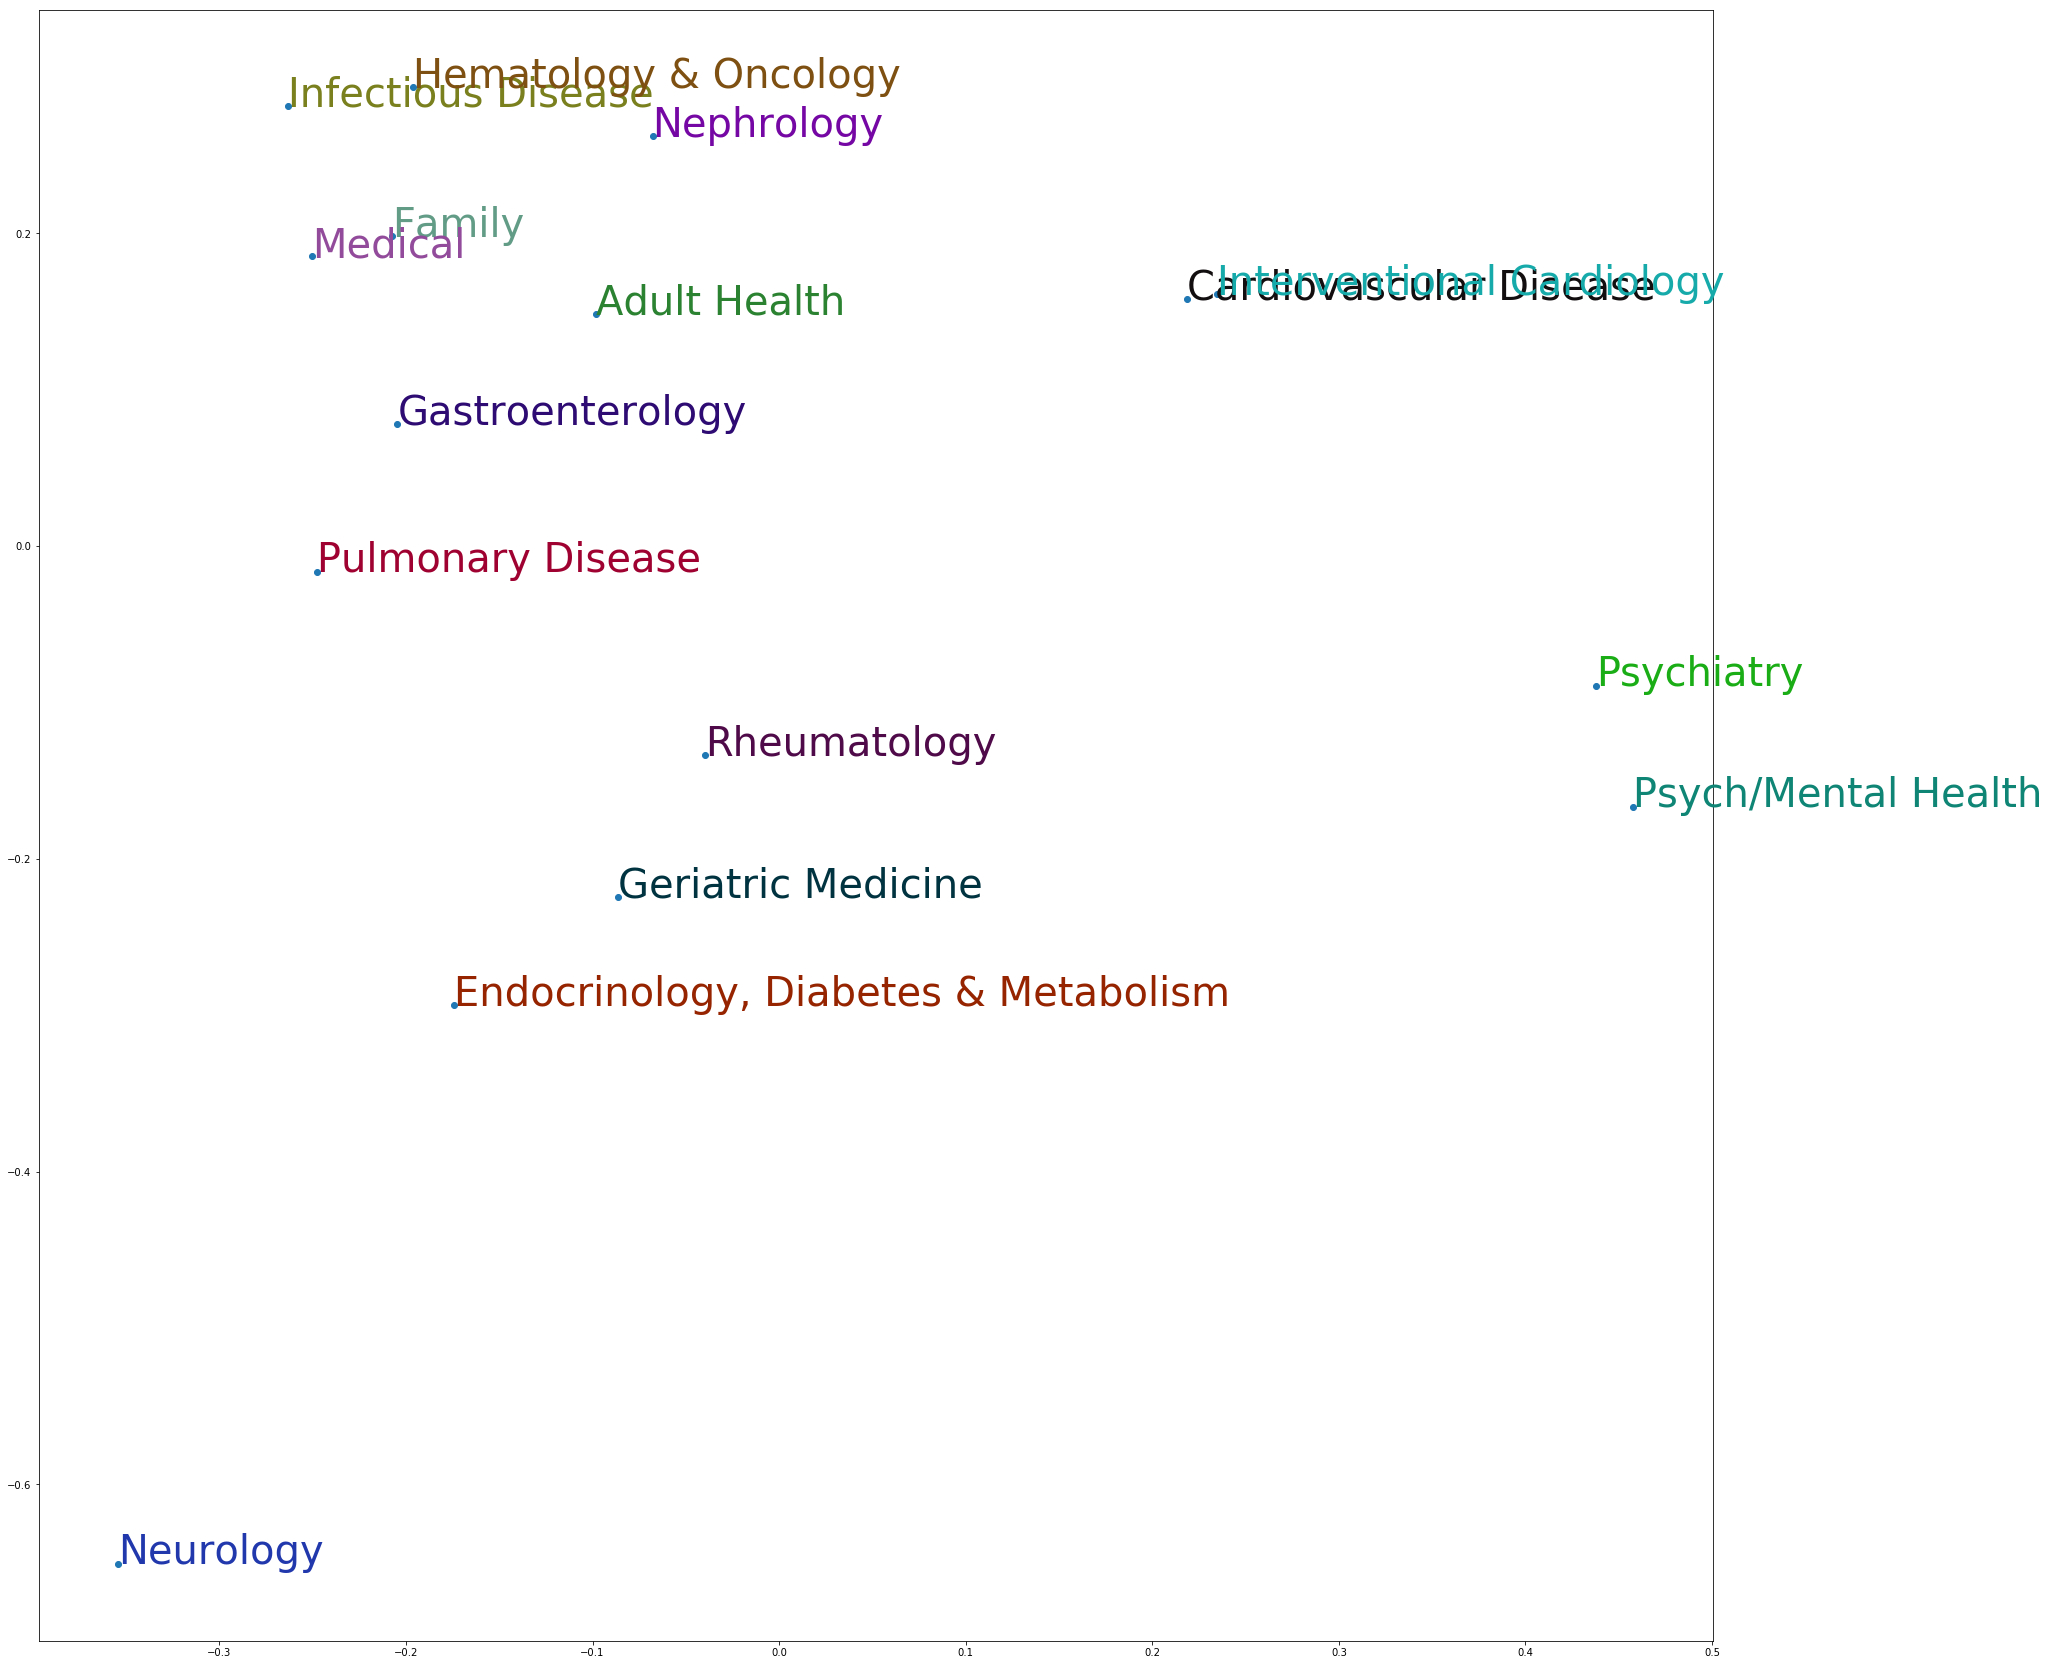

In [231]:

X = fac0
Y = fac1
plt.figure(figsize=(30,30))
plt.scatter(X, Y)
for i, x, y in zip(specialty_emb_map.iloc[:,0], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=40)
plt.show()

In [4]:
product_emb = pd.read_csv("product_emb_mapped.csv")

In [18]:
product_emb.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,0.1
0,0,-0.026285,0.020640,0.010189,-0.014821,-0.058300,0.005202,-0.015160,-0.016471,0.012033,...,0.020683,-0.023633,0.091323,0.004633,-0.011649,0.013494,-0.030316,-0.059938,-0.049357,ABILIFY
1,1,-0.007683,-0.044123,0.011940,-0.011267,0.019661,0.050900,0.063440,-0.024795,-0.013766,...,0.009883,-0.039601,0.026144,-0.021739,-0.011059,0.012495,-0.020544,-0.009330,0.008894,ACETAMINOPHEN-CODEINE
2,2,-0.050423,0.033276,-0.035440,0.017168,0.017291,-0.040847,-0.035294,-0.050938,-0.041266,...,0.032170,-0.039288,0.036541,0.004625,0.020704,-0.037249,-0.001934,-0.025564,0.059949,ADVAIR DISKUS
3,3,0.036867,0.004511,0.015778,0.042955,-0.000018,-0.012652,-0.018962,-0.046476,-0.026803,...,-0.032003,0.062000,0.037036,0.008460,0.032351,-0.004079,0.014199,-0.052325,0.041001,AGGRENOX
4,4,-0.011048,-0.044893,0.014809,0.006570,-0.027233,0.023873,0.000314,-0.046061,-0.008688,...,-0.017177,-0.048204,-0.044817,0.005659,-0.011015,0.000268,0.012745,0.000952,0.010379,ALENDRONATE SODIUM


In [8]:
prod_emb

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.628487e-02,2.063989e-02,1.018850e-02,-1.482133e-02,-5.829992e-02,5.202147e-03,-1.516004e-02,-1.647121e-02,1.203278e-02,-4.393053e-02,-5.093459e-02,2.068347e-02,-2.363323e-02,9.132326e-02,4.632598e-03,-1.164946e-02,1.349409e-02,-3.031564e-02,-5.993793e-02,-4.935697e-02
1,-7.683204e-03,-4.412325e-02,1.194021e-02,-1.126687e-02,1.966119e-02,5.090011e-02,6.343968e-02,-2.479530e-02,-1.376590e-02,1.265166e-02,2.801979e-02,9.882659e-03,-3.960103e-02,2.614432e-02,-2.173863e-02,-1.105875e-02,1.249531e-02,-2.054422e-02,-9.330230e-03,8.894403e-03
2,-5.042251e-02,3.327630e-02,-3.544027e-02,1.716770e-02,1.729080e-02,-4.084693e-02,-3.529395e-02,-5.093776e-02,-4.126559e-02,3.352724e-02,5.397684e-02,3.216984e-02,-3.928765e-02,3.654140e-02,4.624820e-03,2.070398e-02,-3.724947e-02,-1.934117e-03,-2.556406e-02,5.994941e-02
3,3.686661e-02,4.510589e-03,1.577764e-02,4.295477e-02,-1.788648e-05,-1.265224e-02,-1.896235e-02,-4.647641e-02,-2.680337e-02,-1.956732e-02,2.003478e-02,-3.200296e-02,6.199998e-02,3.703618e-02,8.460009e-03,3.235057e-02,-4.079330e-03,1.419854e-02,-5.232516e-02,4.100140e-02
4,-1.104793e-02,-4.489291e-02,1.480913e-02,6.570173e-03,-2.723308e-02,2.387305e-02,3.143509e-04,-4.606055e-02,-8.688085e-03,-2.159877e-02,-3.682555e-02,-1.717707e-02,-4.820358e-02,-4.481748e-02,5.658881e-03,-1.101520e-02,2.683423e-04,1.274506e-02,9.516330e-04,1.037914e-02
5,3.133063e-03,-3.099788e-02,-3.032433e-02,1.423800e-02,-1.252339e-02,-2.839731e-02,3.500579e-02,1.605587e-02,6.551593e-02,-9.026300e-03,2.506598e-02,-8.873547e-04,-3.953821e-02,1.463085e-02,-2.324885e-03,-3.912048e-03,-3.068265e-02,3.243408e-02,9.887110e-03,2.419749e-02
6,7.557114e-03,3.482179e-03,1.781648e-02,5.737671e-03,-3.705104e-02,5.800437e-03,-1.122154e-02,-1.982103e-02,-3.340377e-03,2.858926e-02,-2.694074e-03,3.617367e-02,8.701330e-03,4.871691e-02,-3.017426e-02,-4.222272e-02,-3.361695e-02,-1.496754e-02,-2.897258e-02,-4.460683e-02
7,1.504629e-02,-2.567716e-03,4.198355e-02,1.585680e-02,-5.134944e-02,3.131153e-02,1.985521e-02,4.990644e-02,5.996903e-02,1.199678e-02,-2.296675e-02,-1.227045e-02,-2.994957e-02,2.912033e-03,1.138349e-03,-2.616384e-02,-3.727168e-03,1.624418e-02,3.244144e-02,-3.467995e-02
8,2.799694e-02,-1.622173e-02,1.353102e-02,4.406781e-02,-1.060241e-02,-4.208510e-02,1.846009e-02,1.703952e-02,-1.238060e-02,4.725283e-02,2.199880e-02,5.438114e-02,-1.722650e-02,-1.019045e-02,-4.365579e-02,6.049461e-02,-1.842970e-03,6.035265e-03,-3.545872e-02,2.203633e-02
9,1.216953e-03,-1.336225e-02,-2.566904e-02,9.170170e-04,-2.337567e-04,-1.825194e-02,-1.101410e-02,4.739746e-02,5.752939e-03,-4.982724e-02,1.027577e-03,-4.058028e-02,-6.102486e-02,-1.747224e-02,-2.314712e-02,-1.989119e-02,-3.578850e-02,-2.910676e-02,3.621615e-02,-5.600274e-03


In [10]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
prod_pca = pca1.fit(prod_emb.T).components_

In [11]:
prod_pca.shape

(2, 218)

In [12]:
fac0 = prod_pca[0]
fac1 = prod_pca[1]
prod_comp = [(f, i) for f,i in zip(fac0.T, product_emb_map.iloc[:,0])]



NameError: name 'product_emb_map' is not defined

In [17]:
pd.Series(fac0).to_csv("fac0.csv")
pd.Series(fac1).to_csv("fac1.csv")

In [187]:
fac0.shape

(218,)

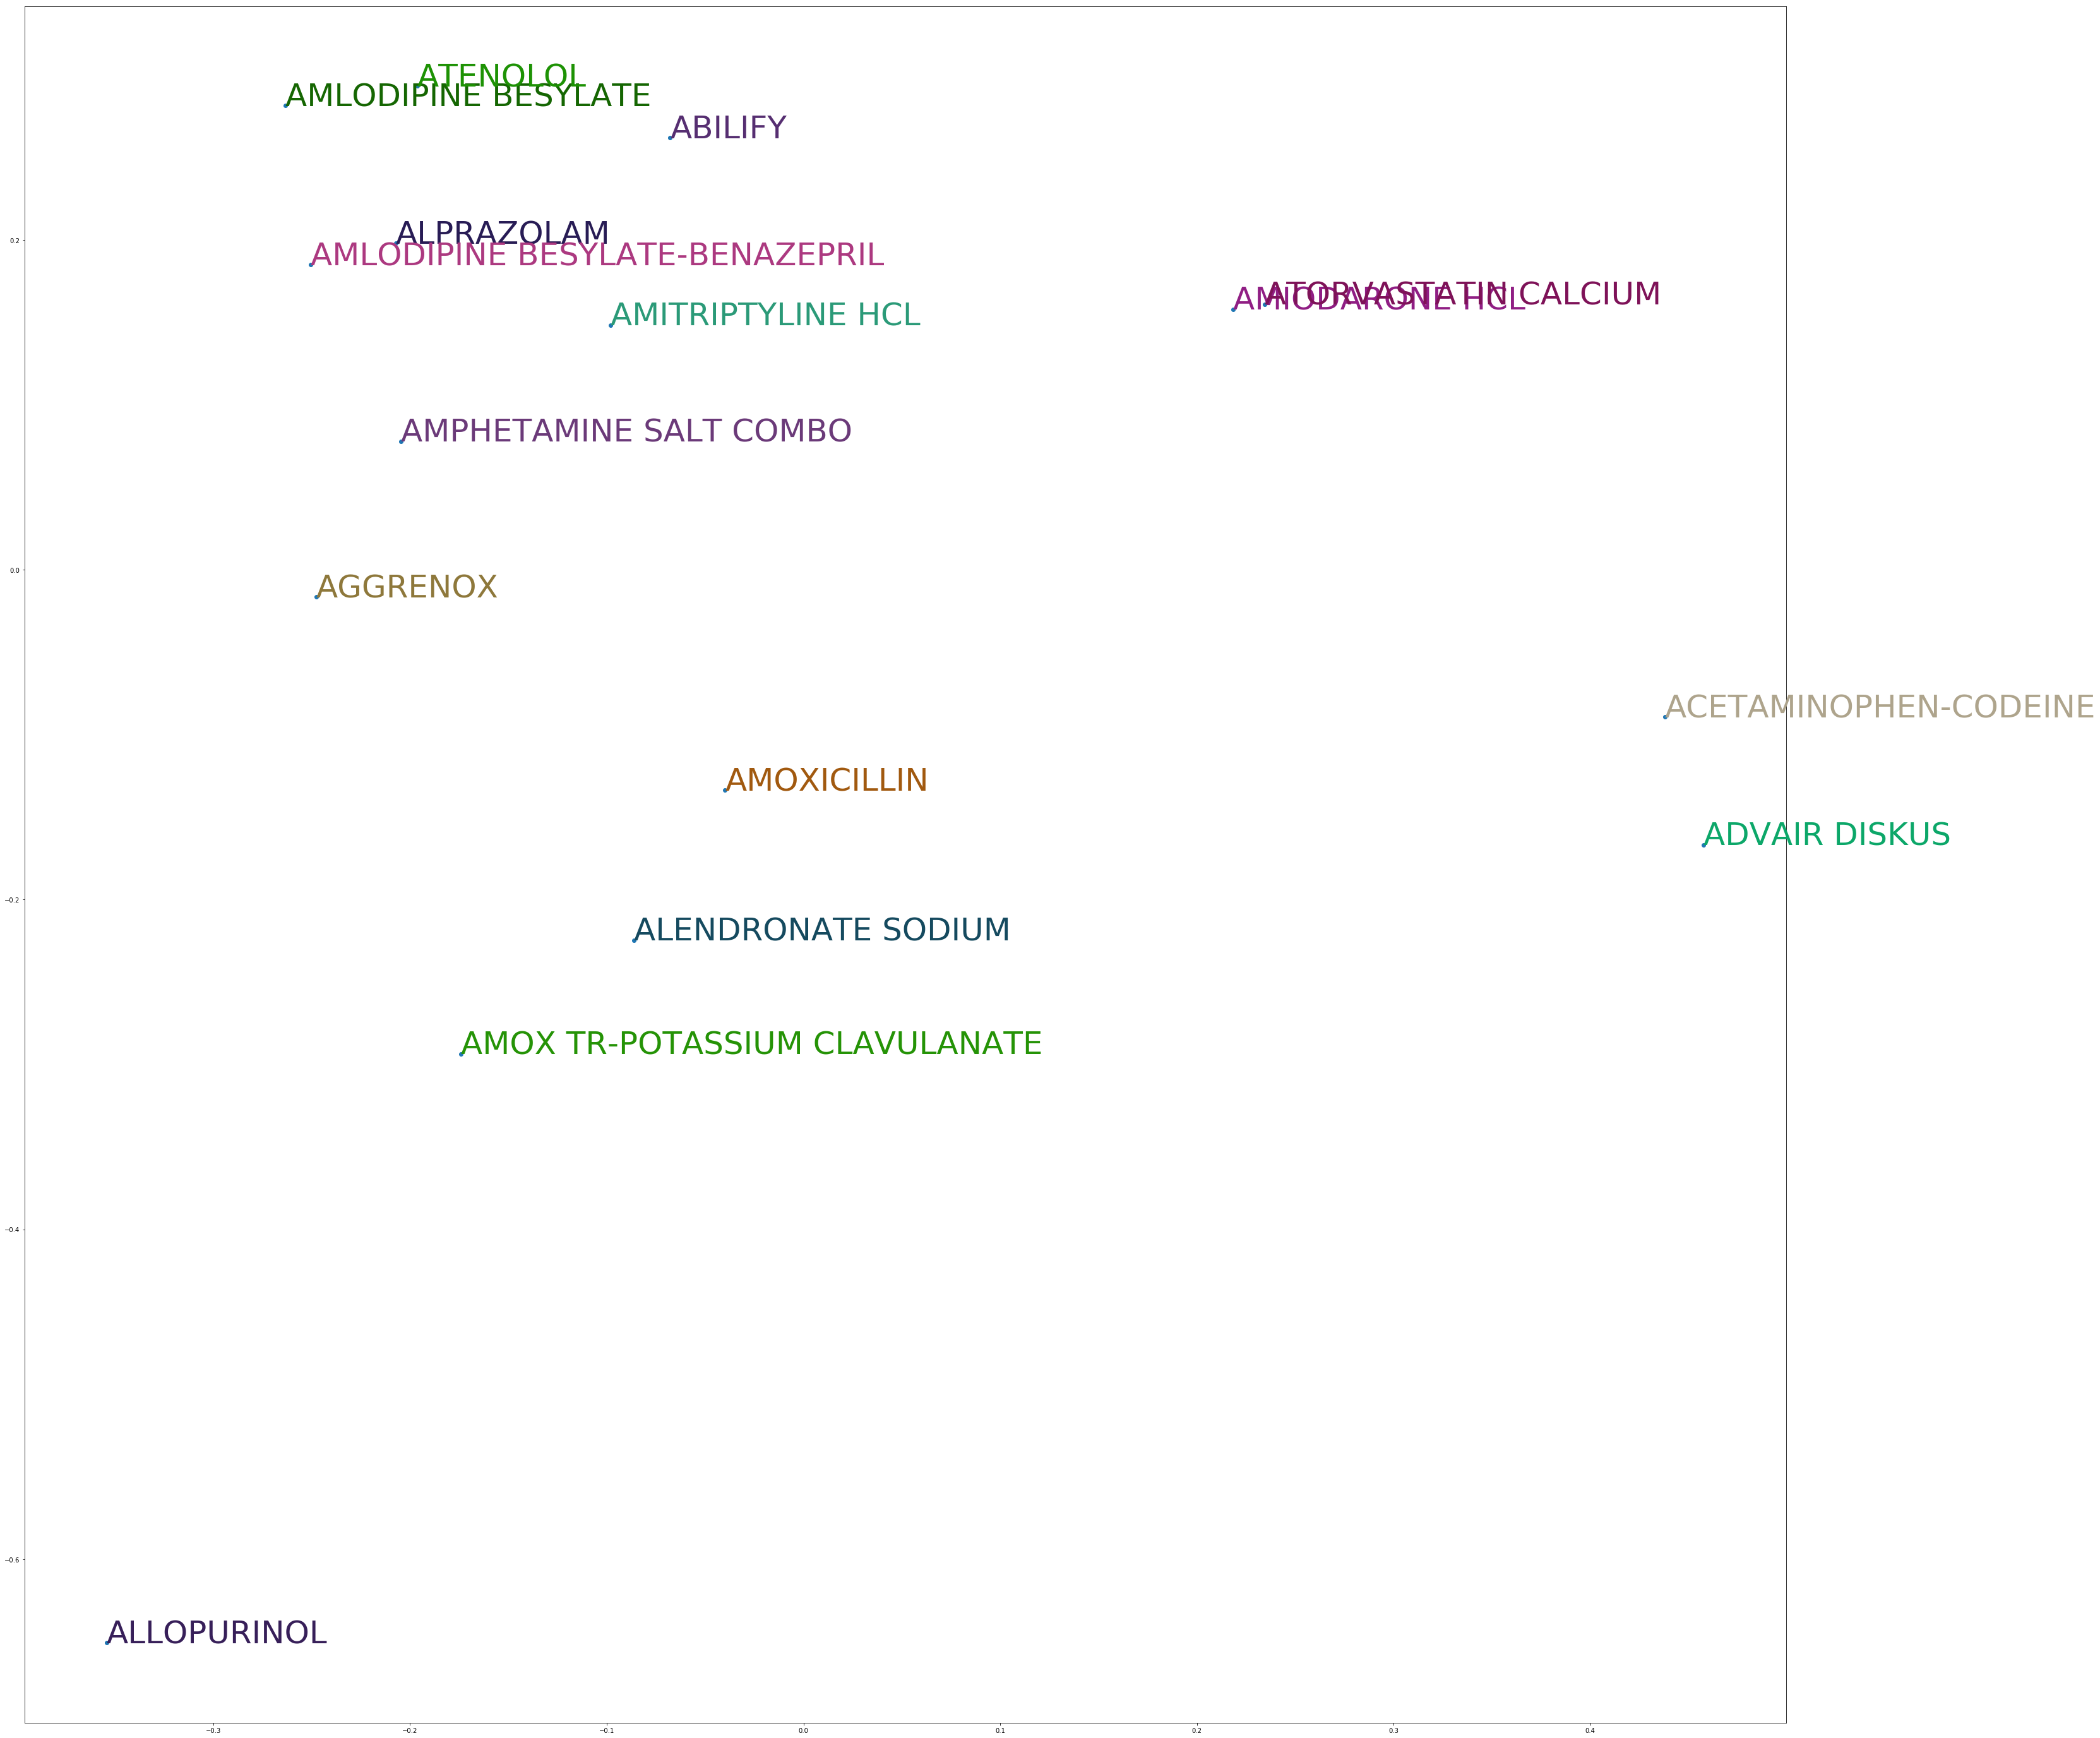

In [230]:
X = fac0
Y = fac1
plt.figure(figsize=(50,50))
plt.scatter(X, Y)
for i, x, y in zip(product_emb_map.iloc[:,0], X, Y):
    plt.text(x,y, i, color=np.random.rand(3)*0.7, fontsize=50)
plt.show()

In [221]:
tsne_drugs = TSNE(n_components=2, perplexity=20)
tsne_op = tsne_drugs.fit_transform(prod_emb)

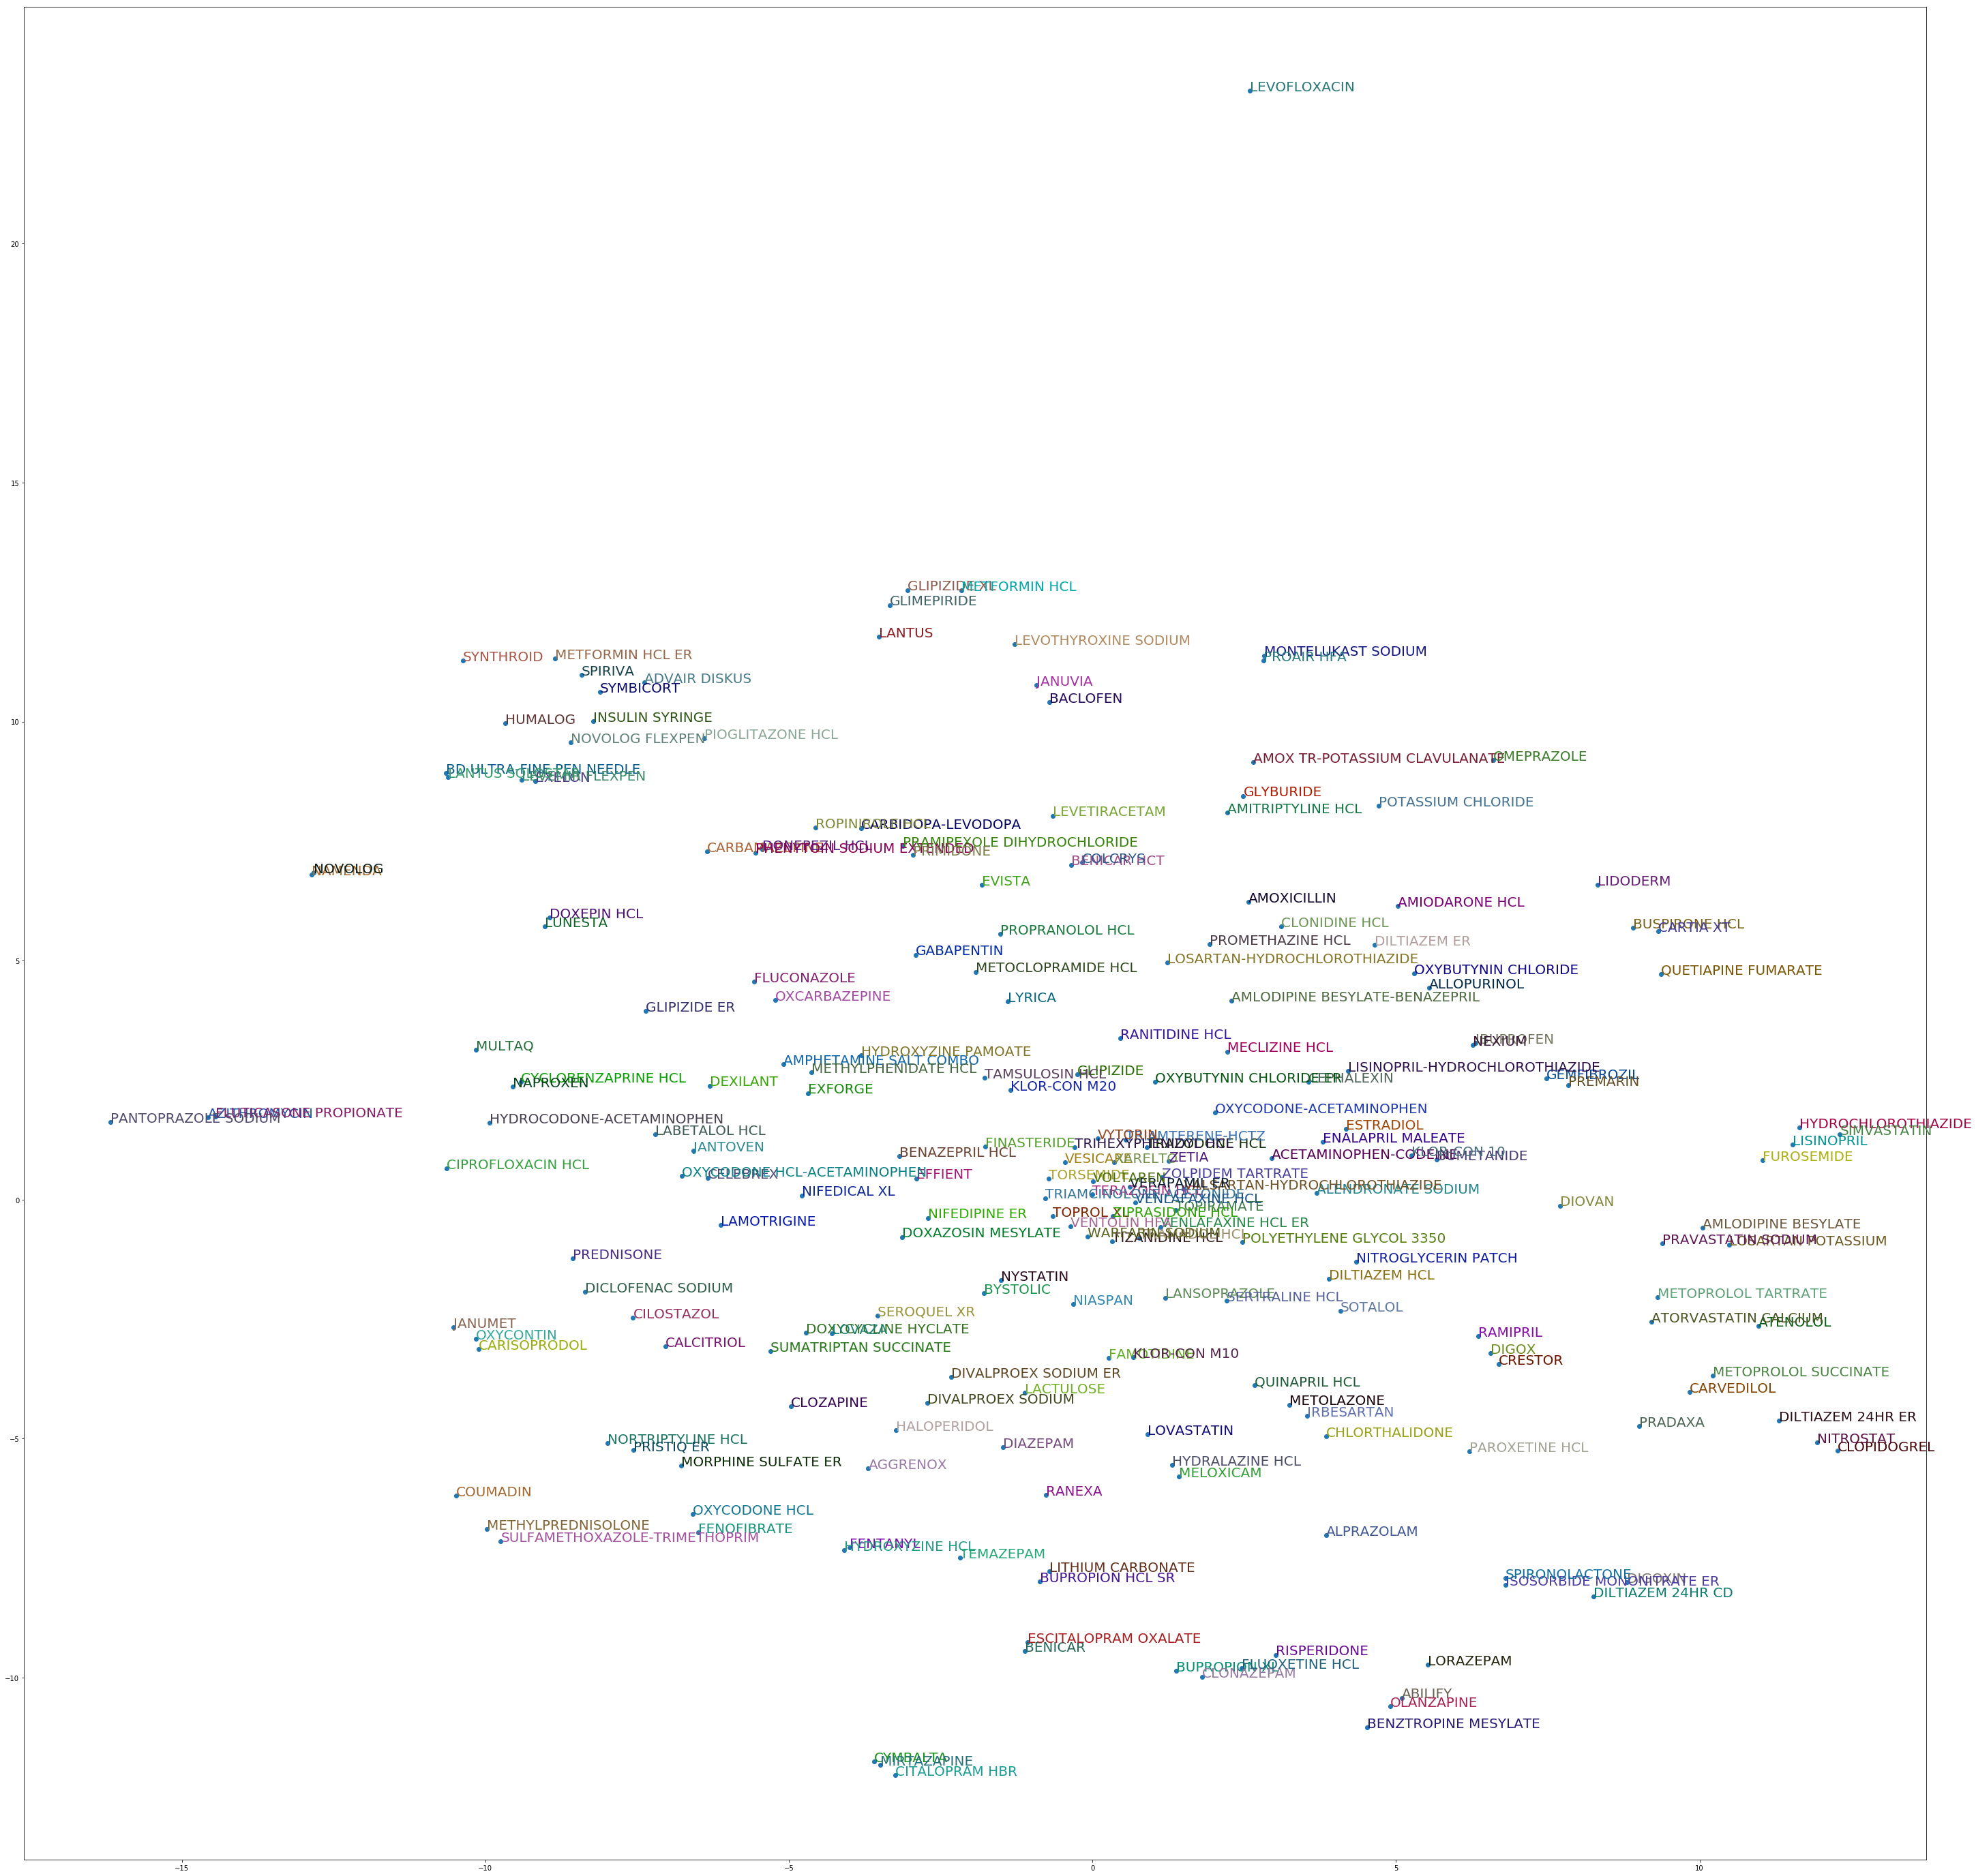

In [222]:
X = tsne_op[:,0]
Y = tsne_op[:,1]
plt.figure(figsize=(50,50))
plt.scatter(X, Y)
for i, x, y in zip(product_emb_map.iloc[:,0], X, Y):
    plt.text(x,y, i, color=np.random.rand(3)*0.7, fontsize=20)
plt.show()

# Analyzing Specialty embedding

In [490]:
print(SpecialtyToId.keys())
print(SpecialtyToId.values())

dict_keys(['Nephrology', 'Psychiatry', 'Psych/Mental Health', 'Pulmonary Disease', 'Geriatric Medicine', 'Neurology', 'Family', 'Cardiovascular Disease', 'Adult Health', 'Infectious Disease', 'Medical', 'Endocrinology, Diabetes & Metabolism', 'Rheumatology', 'Gastroenterology', 'Hematology & Oncology', 'Interventional Cardiology'])
dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])


In [496]:
from sklearn.metrics.pairwise import cosine_similarity

In [498]:
c

,0,1,2,3,4
0,-0.023952,0.032465,-0.034620,-0.036238,0.025871
1,0.011096,0.013319,-0.029968,0.005135,-0.014974
2,0.001650,-0.015646,0.028797,0.034755,-0.010728
3,-0.007587,-0.034948,-0.030497,-0.031439,0.029648
4,0.004806,-0.031026,0.012698,0.021837,-0.036891
5,-0.026934,0.016364,0.023535,-0.006171,-0.024633
6,-0.001632,-0.038127,-0.024304,-0.002730,-0.010987
7,0.006493,0.029331,-0.003259,0.014840,-0.042875
8,0.011975,0.013624,0.026671,0.018572,-0.041152
9,-0.007781,-0.006645,-0.010851,0.016471,0.013837


In [501]:
co = cosine_similarity(c,c , dense_output= True)

In [527]:
SpecialtyToId

{'Adult Health': 8,
 'Cardiovascular Disease': 7,
 'Endocrinology, Diabetes & Metabolism': 11,
 'Family': 6,
 'Gastroenterology': 13,
 'Geriatric Medicine': 4,
 'Hematology & Oncology': 14,
 'Infectious Disease': 9,
 'Interventional Cardiology': 15,
 'Medical': 10,
 'Nephrology': 0,
 'Neurology': 5,
 'Psych/Mental Health': 2,
 'Psychiatry': 1,
 'Pulmonary Disease': 3,
 'Rheumatology': 12}

In [526]:
for i in range(16):
    for j in range(16):
        if(co[i,j] > 0.7):
            print(i,j)

0 0
1 1
2 2
2 4
2 10
3 3
4 2
4 4
4 10
5 5
6 6
7 7
7 8
7 12
8 7
8 8
8 12
9 9
10 2
10 4
10 10
11 11
12 7
12 8
12 12
13 13
14 14
15 15


In [517]:
co

array([[ 1.    ,  0.2389, -0.9071,  0.4538, -0.8731, -0.016 , -0.1678, -0.1951, -0.6512,  0.0592,
        -0.9511,  0.6832, -0.1689, -0.3922,  0.473 , -0.0828],
       [ 0.2389,  1.    , -0.3828, -0.0992, -0.0365, -0.2519,  0.1988,  0.6161,  0.1073,  0.0278,
        -0.0815,  0.6463,  0.5649, -0.6167,  0.4914, -0.1946],
       [-0.9071, -0.3828,  1.    , -0.561 ,  0.7524,  0.1862, -0.0363,  0.1624,  0.6113,  0.158 ,
         0.7587, -0.8785,  0.26  ,  0.333 , -0.5157,  0.4649],
       [ 0.4538, -0.0992, -0.561 ,  1.    , -0.321 , -0.5425,  0.62  , -0.7794, -0.8989,  0.3079,
        -0.2884,  0.2988, -0.8317,  0.1483,  0.3365, -0.5987],
       [-0.8731, -0.0365,  0.7524, -0.321 ,  1.    ,  0.1703,  0.4757,  0.3309,  0.6259, -0.0838,
         0.9378, -0.4231,  0.2521,  0.559 ,  0.015 , -0.1044],
       [-0.016 , -0.2519,  0.1862, -0.5425,  0.1703,  1.    , -0.3959,  0.4674,  0.5494, -0.4872,
        -0.0585, -0.0293,  0.4451,  0.4511,  0.2357,  0.334 ],
       [-0.1678,  0.1988, -0.0363,

# Model Benchmarking

In [389]:
1859771/alias.Trx.shape[0]

1.0

In [247]:
(alias.Trx*alias.Trx).sum()/alias.Trx.shape[0]

0.05133801930814729

In [51]:
nn.save_weights("output3Prelu.h5")

In [121]:
output = nn.predict([np.array(alias.npi) , np.array(alias.Product) , np.array(alias.specialty), np.array(alias.region), 
        np.array(alias.gender) , np.array(alias.settlement_type) , years_in , branded_in])

In [122]:
import scipy
scipy.stats.describe(output)

DescribeResult(nobs=1859771, minmax=(array([ 0.0048], dtype=float32), array([ 0.3744], dtype=float32)), mean=array([ 0.0266], dtype=float32), variance=array([ 0.0006], dtype=float32), skewness=array([ 2.9833], dtype=float32), kurtosis=array([ 13.2014], dtype=float32))

In [123]:
output.__class__

numpy.ndarray

In [124]:
compare = np.concatenate([np.array(alias.Trx)[:, np.newaxis] , output], axis = 1)

In [125]:
(alias.Trx < 12).sum()

1859771

In [126]:
output[np.squeeze(~(output == 0))]

array([[ 0.0117],
       [ 0.0658],
       [ 0.0275],
       ..., 
       [ 0.0101],
       [ 0.0098],
       [ 0.0959]], dtype=float32)

In [127]:
compare[np.squeeze(~(output == 0))]

array([[ 0.    ,  0.0117],
       [ 0.0469,  0.0658],
       [ 0.0019,  0.0275],
       ..., 
       [ 0.0135,  0.0101],
       [ 0.003 ,  0.0098],
       [ 0.0173,  0.0959]])

In [128]:
compare = pd.DataFrame(compare)

In [129]:
compare.describe()

,0,1
count,1.859771e+06,1.859771e+06
mean,3.082630e-02,2.664737e-02
std,5.101316e-02,2.372852e-02
min,0.000000e+00,4.821059e-03
25%,4.243281e-03,1.301583e-02
50%,1.371653e-02,1.747548e-02
75%,3.642384e-02,3.030629e-02
max,1.000000e+00,3.744296e-01


In [130]:
compare.to_csv("compare.csv")

In [248]:
from sklearn.ensemble import RandomForestRegressor

In [249]:
index = np.random.rand(len(alias)) < 0.8 
train = alias.iloc[index, 1:8]
test = alias.iloc[~index, 1:8]

In [250]:
x_train = train.loc[:, ~train.columns.isin(['Trx'])]
x_test = test.loc[:, ~test.columns.isin(['Trx'])]

In [251]:
y_train = train.loc[: ,train.columns.isin(['Trx']) ]
y_test = test.loc[: ,test.columns.isin(['Trx']) ]

In [252]:
lmodel = RandomForestRegressor(n_estimators= 10)

In [253]:
print(x_train.shape , y_train.shape)

(1487476, 6) (1487476, 1)


In [254]:
lmodel.fit(x_train, y_train)

C:\Users\darsh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [255]:
pred = lmodel.predict(x_test)[:, np.newaxis]

In [256]:
print(pred.shape , y_test.shape)

(372295, 1) (372295, 1)


In [257]:
((pred - y_test)*(pred - y_test)).sum()/len(pred)

Trx    0.02702
dtype: float64